# WeatherPy
----

### Student Analysis
* I noticed an outlier in my Max Temp chart. While the data trended as expected, there was one city that had an opposite trend then what was expended in that range of latitude (20 - 40). Lata, India expierenced a max temp of 33 degrees Fahrenheit, which is about 20 to 15 degrees cooler than the nearby cities reviewed. 
---
* In regards to humidity, the same range of latitude (20-40) that had varied temperature also has the widest range of humidity than any other region. This could be due countries location in this latitude range which could be very diverse. Instead of looking at Lat and Lng sperately, spliting the world into quadrants might show more normalized results. 
---
* Cloudiness and Windspeed do not seem to be correlated to the latitude. Regardless of Latitide there was a consistent amount of countries with a cloudiness % that reached 100. Also, interestingly, there was 1 country that expierenced the highest windspeed out of all 500 countries reviewed, which can suggest significant weather activity.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pandas.io.json import json_normalize

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
#print api_key
api_key

'6d4aa959ff606b95ac64b207d16eae7f'

In [3]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

In [5]:
city_names = []

#to reformat city names to fit in url as a complete string
for x in cities: 
 city_reformated = x.replace(" ","_")
 city_names.append(city_reformated)
    
#to create an a list of 50 cities to call every minute
n = 50
city_sets = [city_names[i * n:(i+1)* n] for i in range((len(city_names)+ n -1)// n)]

In [6]:
#test sublist
city_sets[0][1]

'colorado_springs'

### Generate  Query URL

In [7]:
#to create a url for json requests
url = 'https://api.openweathermap.org/data/2.5/weather?q='
api_call = '&appid='+ api_key

#test url
query = url + str(city_sets[0][1]) + api_call
query

'https://api.openweathermap.org/data/2.5/weather?q=colorado_springs&appid=6d4aa959ff606b95ac64b207d16eae7f'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls
* Include a print log of each city as it's being processed (with the city number and city name).


In [8]:
#create an empty list to store the responses
response_weatherjson = []

print("Beginning Data Retrieval")
print('-----------------------------')

#make a request for each of the cities
for x in range(len(city_sets)):
    for j in range(len(city_sets[x])):
        try:
            print(f"Processing list set number: {x} for city {j} of 49; city name: {city_sets[x][j]}")
        except:
            print(f"City not found, skipping to next city")
            #send request
        weather_response = requests.get(url + str(city_sets[x][j]) + api_call)
            #save requests from OpenWeather Historical API
        response_weatherjson.append(weather_response.json())
            
print('---------------------------')
print("Data Retrieval Complete")
print('---------------------------')

Beginning Data Retrieval
-----------------------------
Processing list set number: 0 for city 0 of 49; city name: constitucion
Processing list set number: 0 for city 1 of 49; city name: colorado_springs
Processing list set number: 0 for city 2 of 49; city name: gravdal
Processing list set number: 0 for city 3 of 49; city name: san_quintin
Processing list set number: 0 for city 4 of 49; city name: albany
Processing list set number: 0 for city 5 of 49; city name: guarda
Processing list set number: 0 for city 6 of 49; city name: mataura
Processing list set number: 0 for city 7 of 49; city name: georgetown
Processing list set number: 0 for city 8 of 49; city name: isangel
Processing list set number: 0 for city 9 of 49; city name: te_anau
Processing list set number: 0 for city 10 of 49; city name: krasnoselkup
Processing list set number: 0 for city 11 of 49; city name: fortuna
Processing list set number: 0 for city 12 of 49; city name: victoria
Processing list set number: 0 for city 13 of 4

Processing list set number: 2 for city 18 of 49; city name: mogok
Processing list set number: 2 for city 19 of 49; city name: abbeville
Processing list set number: 2 for city 20 of 49; city name: emerald
Processing list set number: 2 for city 21 of 49; city name: damghan
Processing list set number: 2 for city 22 of 49; city name: beaverlodge
Processing list set number: 2 for city 23 of 49; city name: tarabuco
Processing list set number: 2 for city 24 of 49; city name: tomohon
Processing list set number: 2 for city 25 of 49; city name: qaanaaq
Processing list set number: 2 for city 26 of 49; city name: dikson
Processing list set number: 2 for city 27 of 49; city name: arraial_do_cabo
Processing list set number: 2 for city 28 of 49; city name: sorland
Processing list set number: 2 for city 29 of 49; city name: houma
Processing list set number: 2 for city 30 of 49; city name: tezu
Processing list set number: 2 for city 31 of 49; city name: aguililla
Processing list set number: 2 for city 

Processing list set number: 4 for city 36 of 49; city name: kalasin
Processing list set number: 4 for city 37 of 49; city name: nemuro
Processing list set number: 4 for city 38 of 49; city name: bereda
Processing list set number: 4 for city 39 of 49; city name: provideniya
Processing list set number: 4 for city 40 of 49; city name: portland
Processing list set number: 4 for city 41 of 49; city name: bengkulu
Processing list set number: 4 for city 42 of 49; city name: dalbandin
Processing list set number: 4 for city 43 of 49; city name: talnakh
Processing list set number: 4 for city 44 of 49; city name: saint-francois
Processing list set number: 4 for city 45 of 49; city name: puerto_leguizamo
Processing list set number: 4 for city 46 of 49; city name: butaritari
Processing list set number: 4 for city 47 of 49; city name: tidore
Processing list set number: 4 for city 48 of 49; city name: tautira
Processing list set number: 4 for city 49 of 49; city name: necochea
Processing list set num

Processing list set number: 7 for city 5 of 49; city name: maraa
Processing list set number: 7 for city 6 of 49; city name: almaznyy
Processing list set number: 7 for city 7 of 49; city name: severo-kurilsk
Processing list set number: 7 for city 8 of 49; city name: nampa
Processing list set number: 7 for city 9 of 49; city name: gogrial
Processing list set number: 7 for city 10 of 49; city name: luderitz
Processing list set number: 7 for city 11 of 49; city name: eureka
Processing list set number: 7 for city 12 of 49; city name: la_palma
Processing list set number: 7 for city 13 of 49; city name: yenagoa
Processing list set number: 7 for city 14 of 49; city name: kushima
Processing list set number: 7 for city 15 of 49; city name: roald
Processing list set number: 7 for city 16 of 49; city name: le_vauclin
Processing list set number: 7 for city 17 of 49; city name: pithora
Processing list set number: 7 for city 18 of 49; city name: laramie
Processing list set number: 7 for city 19 of 49

Processing list set number: 9 for city 24 of 49; city name: jasper
Processing list set number: 9 for city 25 of 49; city name: bogorodskoye
Processing list set number: 9 for city 26 of 49; city name: longyan
Processing list set number: 9 for city 27 of 49; city name: thinadhoo
Processing list set number: 9 for city 28 of 49; city name: port_hedland
Processing list set number: 9 for city 29 of 49; city name: muzaffarabad
Processing list set number: 9 for city 30 of 49; city name: natal
Processing list set number: 9 for city 31 of 49; city name: kamaishi
Processing list set number: 9 for city 32 of 49; city name: mendahara
Processing list set number: 9 for city 33 of 49; city name: fort_saint_john
Processing list set number: 9 for city 34 of 49; city name: mount_gambier
Processing list set number: 9 for city 35 of 49; city name: saint-joseph
Processing list set number: 9 for city 36 of 49; city name: zyryanka
Processing list set number: 9 for city 37 of 49; city name: haines_junction
Pro

Processing list set number: 11 for city 43 of 49; city name: hervey_bay
---------------------------
Data Retrieval Complete
---------------------------


In [9]:
#print how many requests we have
print(f"We have {len(response_weatherjson)} cities weather data!")

We have 594 cities weather data!


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#to make sure json call didn't produce an error
response_weatherjson[1]

{'cod': '404', 'message': 'city not found'}

In [11]:
#normalize nest columns in json data

df = pd.DataFrame.from_dict(json_normalize(response_weatherjson), orient= 'columns')
df_1 = df.drop(['weather','base','main.pressure','main.temp_min','main.grnd_level','main.sea_level','main.temp','visibility','wind.deg','sys.id','sys.message','sys.sunrise','sys.sunset','timezone','id','cod','message','rain.1h','rain.3h','sys.type','wind.gust'], axis=1)
df_2 = df_1.rename(columns = {'name':'City',
                              'clouds.all':'Cloudiness',
                              'coord.lat':'Lat',
                              'coord.lon':'Lng',
                              'dt':'Date',
                              'main.humidity':'Humidity',
                              'main.temp_max':'Max Temp',
                              'sys.country':'Country',
                              'wind.speed':'Wind Speed'
                             })
df_final= df_2.dropna(axis=0, subset=['City'])
df_final.head()

,Cloudiness,Lat,Lng,Date,Humidity,Max Temp,City,Country,Wind Speed
0,40.0,23.99,-104.67,1.560788e+09,49.0,297.04,Constitucion,MX,2.42
2,75.0,59.79,5.78,1.560788e+09,82.0,288.15,Gravdal,NO,7.70
4,75.0,42.65,-73.75,1.560788e+09,53.0,295.93,Albany,US,3.10
5,100.0,40.54,-7.27,1.560788e+09,31.0,297.04,Guarda,PT,2.06
6,88.0,-46.19,168.86,1.560788e+09,78.0,279.26,Mataura,NZ,2.34


In [12]:
#convert max temp to degree fahrenheit
df_final['Max Temp'] = ((df_final['Max Temp']-273)+32).round(0)
df_final= df_final.dropna()

In [13]:
df_final.count()

Cloudiness    446
Lat           446
Lng           446
Date          446
Humidity      446
Max Temp      446
City          446
Country       446
Wind Speed    446
dtype: int64

In [14]:
output_data_file = "./cities.csv"
df_final.to_csv(output_data_file, sep=',', encoding= 'utf-8', index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [15]:
# Minor Data Munging to Re-Format the Data Frames
lat = df_final.iloc[:,1:6].drop(columns = ['Lng','Date','Humidity'])
lat.head()

,Lat,Max Temp
0,23.99,56.0
2,59.79,47.0
4,42.65,55.0
5,40.54,56.0
6,-46.19,38.0


In [16]:
#set axises
temp_x_axis = lat.iloc[:,0]
temp_y_axis = lat.iloc[:,1]

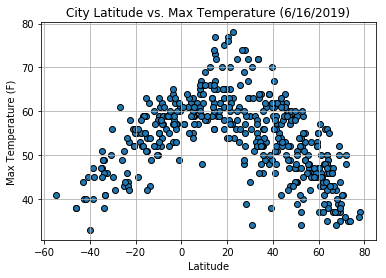

In [17]:
# Generate the scatter plot
    
ax = plt.scatter(temp_x_axis,temp_y_axis, marker ="o",edgecolors='black')

#assign axis labels and grid lines
plt.grid(True)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title('City Latitude vs. Max Temperature (6/16/2019)')

#format plot
ax.use_sticky_edges = False


# Save the Figure
plt.savefig('City_Latitude_vs_Temp.png',dpi=150, bbox_inches = 'tight')
plt.show()


In [18]:
#observation analysis
max_temp = df_final[(df_final["Lat"] >= 20) & (df_final["Lat"] <= 40)]

In [19]:
max_temp.loc[max_temp['Max Temp'] == max_temp['Max Temp'].min()]

,Cloudiness,Lat,Lng,Date,Humidity,Max Temp,City,Country,Wind Speed
147,77.0,30.78,78.62,1.560788e+09,91.0,34.0,Lata,IN,4.99


#### Latitude vs. Humidity Plot

In [20]:
#set axises
hum_x_axis = df_final.iloc[:,1]
hum_y_axis = df_final.iloc[:,4]

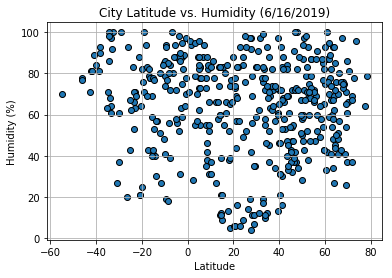

In [21]:
# Generate the scatter plot
    
ax = plt.scatter(hum_x_axis,hum_y_axis, marker ="o",edgecolors='black')

#assign axis labels and grid lines
plt.grid(True)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title('City Latitude vs. Humidity (6/16/2019)')

#format plot
ax.use_sticky_edges = False


# Save the Figure
plt.savefig('City_Latitude_vs_Hum.png',dpi=150, bbox_inches = 'tight')
plt.show()


#### Latitude vs. Cloudiness Plot

In [22]:
# Minor Data Munging to Re-Format the Data Frames
clouds = df_final.iloc[:,0:2]
clouds.head()

,Cloudiness,Lat
0,40.0,23.99
2,75.0,59.79
4,75.0,42.65
5,100.0,40.54
6,88.0,-46.19


In [23]:
#set axises
clouds_x_axis = clouds.iloc[:,1]
clouds_y_axis = clouds.iloc[:,0]

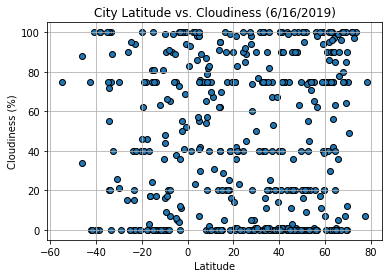

In [24]:
# Generate the scatter plot
    
ax = plt.scatter(clouds_x_axis,clouds_y_axis, marker ="o",edgecolors='black')

#assign axis labels and grid lines
plt.grid(True)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title('City Latitude vs. Cloudiness (6/16/2019)')

#format plot
ax.use_sticky_edges = False


# Save the Figure
plt.savefig('City_Latitude_vs_Clouds.png',dpi=150, bbox_inches = 'tight')
plt.show()


#### Latitude vs. Wind Speed Plot

In [25]:
# Minor Data Munging to Re-Format the Data Frames
winds = df_final.drop(columns = df_final.columns[2:8])
winds.head()
#it is now that I realize I didn't need to drop columns :-D

,Cloudiness,Lat,Wind Speed
0,40.0,23.99,2.42
2,75.0,59.79,7.70
4,75.0,42.65,3.10
5,100.0,40.54,2.06
6,88.0,-46.19,2.34


In [26]:
#set axises
winds_x_axis = winds.iloc[:,1]
winds_y_axis = winds.iloc[:,2]

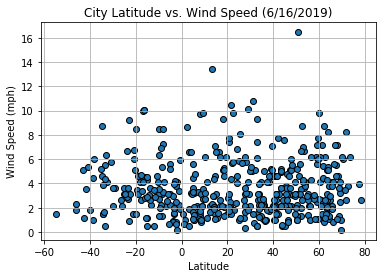

In [27]:
# Generate the scatter plot
    
ax = plt.scatter(winds_x_axis,winds_y_axis, marker ="o",edgecolors='black')

#assign axis labels and grid lines
plt.grid(True)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title('City Latitude vs. Wind Speed (6/16/2019)')

#format plot
ax.use_sticky_edges = False


# Save the Figure
plt.savefig('City_Latitude_vs_Wind.png',dpi=150, bbox_inches = 'tight')
plt.show()

